In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv("sales_transactions.csv")

In [3]:
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


## 1 total revenue generated

In [4]:
total_revenue = sales["Revenue"].sum()
total_revenue

np.int64(29521000)

## 2 total transactions recorded

In [5]:
total_transactions = sales["TransactionID"].nunique()
total_transactions

110

## 3 distinct customers purchases

In [6]:
distinct_customers = sales["CustomerID"].nunique()
distinct_customers

77

## 4 total revenue generated from Lagos

In [7]:
lagos_revenue = sales[sales["City"] == "Lagos"]["Revenue"].sum()
lagos_revenue

np.int64(9285500)

## 5  units of Accessories sold in Abuja

In [8]:
abuja_accessories_units = sales[(sales["City"] == "Abuja") & (sales["Category"] == "Accessories")]["UnitsSold"].sum()
abuja_accessories_units

np.int64(22)

## 6 average discount offered across all transactions

In [9]:
average_discount = sales["Discount"].mean()
average_discount

np.float64(3248.181818181818)

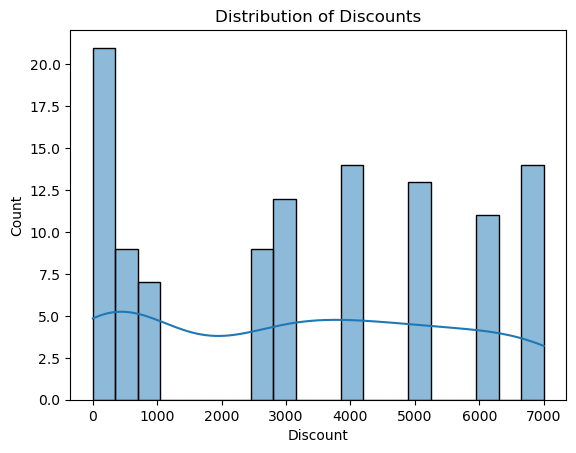

In [10]:
sns.histplot(data=sales, x="Discount", bins=20, kde=True)
plt.title("Distribution of Discounts")
plt.show()

 ## 7 revenue for February 2024

In [11]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [12]:
feb_2024_revenue = sales[sales["Date"].dt.to_period("M") == "2024-02"]["Revenue"].sum()
feb_2024_revenue

np.int64(3855000)

## 8 month with the highest sales revenue

In [13]:
monthly_revenue = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum()
highest_revenue_month = monthly_revenue.idxmax()
highest_revenue_month

Period('2024-09', 'M')

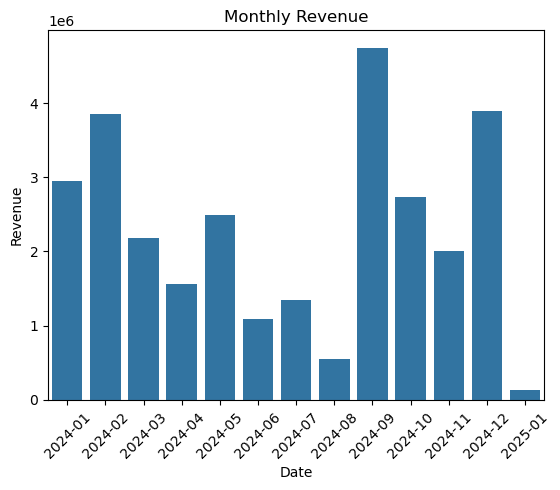

In [14]:
monthly_revenue = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum().reset_index()
monthly_revenue["Date"] = monthly_revenue["Date"].astype(str)

sns.barplot(data=monthly_revenue, x="Date", y="Revenue")
plt.xticks(rotation=45)
plt.title("Monthly Revenue")
plt.show()

## 9 Monthly revenue trend

In [15]:
monthly_trend = monthly_revenue.reset_index().rename(columns={"Date": "Month", "Revenue": "MonthlyRevenue"})
monthly_trend

,index,Month,MonthlyRevenue
0,0,2024-01,2943000
1,1,2024-02,3855000
2,2,2024-03,2184500
3,3,2024-04,1559500
4,4,2024-05,2484500
5,5,2024-06,1083000
6,6,2024-07,1340000
7,7,2024-08,552500
8,8,2024-09,4744500
9,9,2024-10,2739000


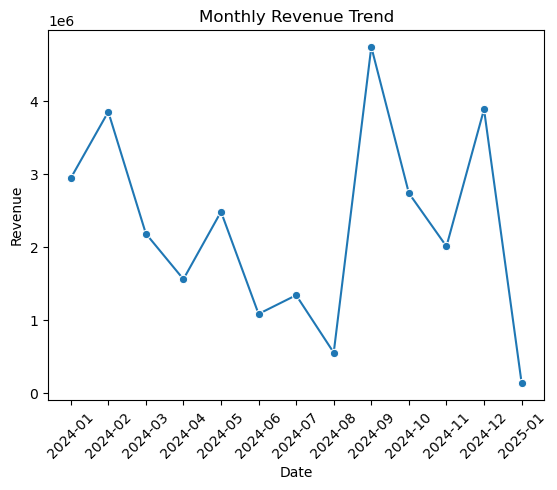

In [16]:
monthly_trend = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum().reset_index()
monthly_trend["Date"] = monthly_trend["Date"].astype(str)

sns.lineplot(data=monthly_trend, x="Date", y="Revenue", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()

## 10 Revenue split by customer type

In [17]:
revenue_by_customer_type = sales.groupby("CustomerType")["Revenue"].sum()
revenue_by_customer_type

CustomerType
New          12027000
Returning    17494000
Name: Revenue, dtype: int64

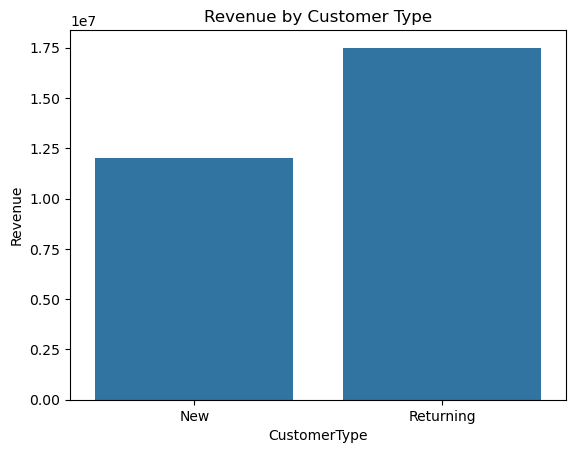

In [18]:
revenue_by_customer_type = sales.groupby("CustomerType")["Revenue"].sum().reset_index()

sns.barplot(data=revenue_by_customer_type, x="CustomerType", y="Revenue")
plt.title("Revenue by Customer Type")
plt.show()

## 11 Average revenue per customer

In [19]:
avg_revenue_per_customer = sales.groupby('CustomerID')['Revenue'].mean().reset_index()
avg_revenue_per_customer

,CustomerID,Revenue
0,C001,119000.0
1,C002,85000.0
2,C003,20000.0
3,C004,160000.0
4,C005,180000.0
...,...,...
72,C138,316000.0
73,C140,575000.0
74,C143,540000.0
75,C144,717000.0


## 12 Customers who bought more than once

In [20]:
repeat_customers = sales["CustomerID"].value_counts()
customers_bought_more_than_once = (repeat_customers > 1).sum()
customers_bought_more_than_once

np.int64(23)

## 13 Category with most revenue

In [21]:
category_revenue = sales.groupby("Category")["Revenue"].sum()
top_category = category_revenue.idxmax()
top_category

'Electronics'

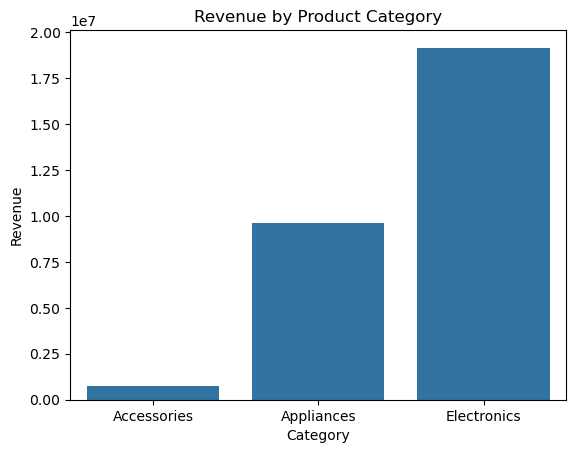

In [22]:
category_revenue = sales.groupby("Category")["Revenue"].sum().reset_index()

sns.barplot(data=category_revenue, x="Category", y="Revenue")
plt.title("Revenue by Product Category")
plt.show()

## 14 Average revenue per unit for Electronics

In [23]:
electronics = sales[sales["Category"] == "Electronics"]
avg_revenue_per_unit_electronics = electronics["Revenue"].sum() / electronics["UnitsSold"].sum()
avg_revenue_per_unit_electronics

np.float64(156959.0163934426)

## 15 Sales rep with highest revenue

In [24]:
top_sales_rep = sales.groupby("SalesRep")["Revenue"].sum().idxmax()
top_sales_rep

'Abdul Salim'

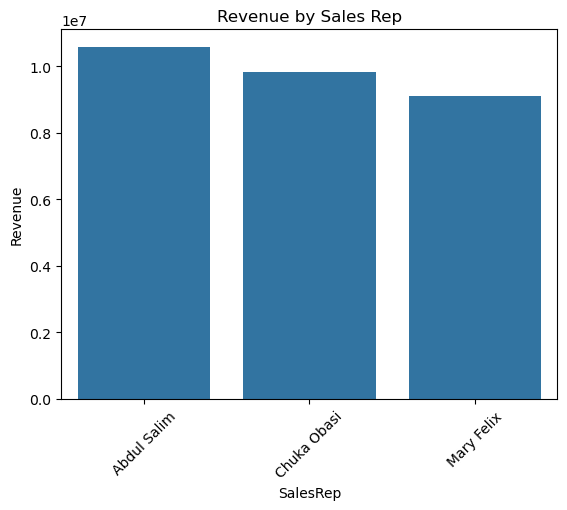

In [25]:
revenue_by_rep = sales.groupby("SalesRep")["Revenue"].sum().reset_index()

sns.barplot(data=revenue_by_rep, x="SalesRep", y="Revenue")
plt.xticks(rotation=45)
plt.title("Revenue by Sales Rep")
plt.show()

## 16 Total units sold by each sales rep

In [26]:
units_by_sales_rep = sales.groupby("SalesRep")["UnitsSold"].sum()
units_by_sales_rep

SalesRep
Abdul Salim    134
Chuka Obasi    110
Mary Felix     113
Name: UnitsSold, dtype: int64

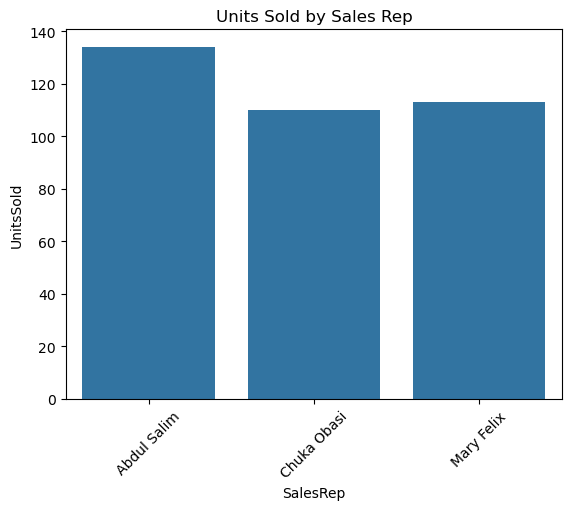

In [27]:
units_by_rep = sales.groupby("SalesRep")["UnitsSold"].sum().reset_index()

sns.barplot(data=units_by_rep, x="SalesRep", y="UnitsSold")
plt.xticks(rotation=45)
plt.title("Units Sold by Sales Rep")
plt.show()

## 17 Revenue from Lagos by New customers

In [28]:
lagos_new_revenue = sales[(sales["City"] == "Lagos") & (sales["CustomerType"] == "New")]["Revenue"].sum()
lagos_new_revenue

np.int64(2563000)

## 18 Revenue excluding Port Harcourt

In [29]:
revenue_excluding_ph = sales[sales["City"] != "Port Harcourt"]["Revenue"].sum()
revenue_excluding_ph

np.int64(22559000)

## 19 Average units sold per transaction


In [30]:
avg_units_per_transaction = sales["UnitsSold"].mean()
avg_units_per_transaction

np.float64(3.2454545454545456)

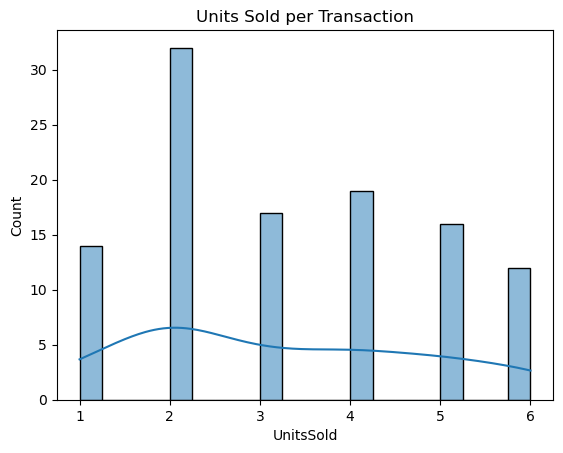

In [31]:
sns.histplot(data=sales, x="UnitsSold", bins=20, kde=True)
plt.title("Units Sold per Transaction")
plt.show()

## 20. Total discount value

In [32]:
total_discount_value = sales["Discount"].sum()
total_discount_value 

np.int64(357300)

In [33]:
city_percentages = (sales.groupby('City')['Revenue'].sum() / sales['Revenue'].sum()) * 100
print(city_percentages.round(2))

City
Abuja            14.67
Kano             30.29
Lagos            31.45
Port Harcourt    23.58
Name: Revenue, dtype: float64


In [34]:
total_discount = sales['Discount'].sum()
print(f"Total discount given: {total_discount}")

Total discount given: 357300
